# Free Vibrations

---

**You can edit the exercises directly in the cells.**<br>
- **Jupyter notebook quick start:**
- \<Shift>+\<Return> --> runs a cell
- ! --> shell escape [! Linux command line]
- use a (above) and b (below) left of the [ ] to open new cells
&nbsp;<br>;<br>

## Exercise 2: A Car’s Suspension System

### 1. Problem Description
A car’s suspension system can be modelled as a mass-spring-damper system. Suppose a car with a mass of 1500 kg has a suspension system with a spring constant of 20,000 N/m and a damping coefficient of 1,500 N·s/m. The car hits a bump, causing an initial displacement of 0.05 m and an initial velocity of 0 m/s. 
Write a code to plot the displacement of the car over time.

### 2. Theoretical Background
The equation of motion is a 2nd-order ODE:

$$m\ddot{x} + c\dot{x} + kx = 0$$

> 

---

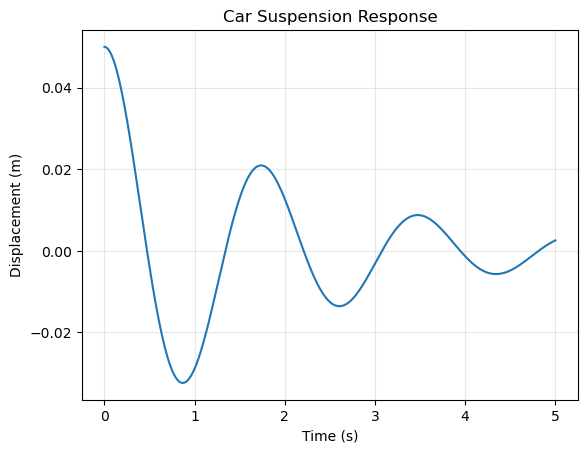

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 1. Parameters
k = 20000      
c = 1500       
m_base = 1500  

x_init = [0.05, 0.0]  
t_span = (0, 5)
t_eval = np.linspace(0, 5, 1000)

# 2. ODE Function: x'' = -(c/m)v - (k/m)x
def suspension_ode(t, z, m, c, k):
    x, v = z
    return [v, -(c/m)*v - (k/m)*x]

# 3. Calculations and Solving
zeta_base = c / (2 * np.sqrt(m_base * k))
sol_base = solve_ivp(suspension_ode, t_span, x_init, args=(m_base, c, k), t_eval=t_eval)

# 4. Visualization
#plt.figure(figsize=(10, 6))
plt.plot(sol_base.t, sol_base.y[0])
plt.title('Car Suspension Response')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.grid(True, alpha=0.3)
plt.show()

---
### Exercise 1.1

Calculate the damping ratio $\zeta$. Determine if the system is underdamped, critically damped, or overdamped.


In [11]:
import numpy as np

m = 1500 
k = 20000 
c = 1500  

# Calculate the damping ratio (zeta)
zeta = c / (2 * np.sqrt(m * k))

# Determine the system regime
if zeta < 1:
    regime = "Underdamped"
elif zeta == 1:
    regime = "Critically Damped"
else:
    regime = "Overdamped"
    
# Output the results
print(f"Damping Ratio: {zeta:.4f}")
print(f"System Status: {regime}")


Damping Ratio: 0.1369
System Status: Underdamped


#### Conclusions


Since $\zeta < 1$, the car will bounce several times before coming to rest. For optimal passenger comfort, automotive engineers often aim for $\zeta \approx 0.7$ (close to critical damping).


### Exercise 1.2: Baseline vs. Fully Loaded Scenario

Compare the baseline response with a "fully loaded" scenario where the mass increases to 2 000 kg.

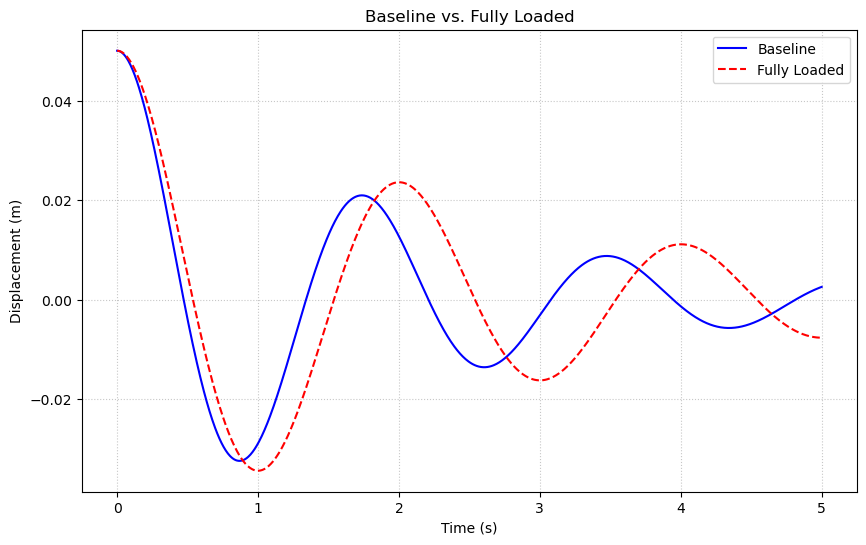

Baseline Damping Ratio: 0.1369
Loaded Damping Ratio: 0.1186


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

k = 20000      
c = 1500      
m_b = 1500  
m_l = 2000    

x_init = [0.05, 0.0]
t_span = (0, 5)
t_eval = np.linspace(0, 5, 1000)

def suspension_system(t, z, m, c, k):
    x, v = z
    return [v, -(c/m)*v - (k/m)*x]

# 3. Solve for both scenarios
sol_base = solve_ivp(suspension_system, t_span, x_init, args=(m_b, c, k), t_eval=t_eval)
sol_load = solve_ivp(suspension_system, t_span, x_init, args=(m_l, c, k), t_eval=t_eval)

# 4. Calculate Damping Ratios for context
zeta_base = c / (2 * np.sqrt(m_b * k))
zeta_load = c / (2 * np.sqrt(m_l * k))

# 5. Visualization
plt.figure(figsize=(10, 6))
plt.plot(sol_base.t, sol_base.y[0], 'b-', label=f'Baseline')
plt.plot(sol_load.t, sol_load.y[0], 'r--', label=f'Fully Loaded')

plt.title('Baseline vs. Fully Loaded')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

# Print
print(f"Baseline Damping Ratio: {zeta_base:.4f}")
print(f"Loaded Damping Ratio: {zeta_load:.4f}")

#### Conclusions

When the mass increases (the red dashed line in the plot), you will notice two things: 

**Frequency decreases**: The car "swings" more slowly because the natural frequency $\omega_n = \sqrt{k/m}$ is lower. 

**Damping Ratio decreases**: Since $m$ is in the denominator of the $\zeta$ formula, a heavier car with the same shock absorbers will actually feel "bouncier" and take longer to stabilise.